## Key Clouds

In [1]:
#!pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import nltk

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Tokenisation

In [4]:
df = pd.read_csv('comments.csv')
content = " ".join(df['textClean'])

In [5]:
words = nltk.word_tokenize(content, language='french')
words[1030:1050]

['pas',
 'besoin',
 'de',
 'causer',
 '.',
 "c'est",
 'exactement',
 'parce',
 'que',
 "l'apparition",
 'de',
 'la',
 'vie',
 'aussi',
 'primitive',
 'soit-elle',
 ',',
 'est',
 'un',
 'miracle']

In [6]:
words = [word for word in words if word.isalpha()]
words[1030:1050]

['intéressant',
 'et',
 'bien',
 'fait',
 'bonne',
 'année',
 'et',
 'plein',
 'de',
 'bisous',
 'super',
 'vidéo',
 'merci',
 'pour',
 'ton',
 'taff',
 'il',
 'quelque',
 'chose',
 'de']

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Retirer les stopwords

In [8]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
#print(stopwords.words("french"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stop_words = set(stopwords.words('french'))

words = [w for w in words if not w in stop_words]
print(words[1030:1050])

['bleu', 'review', 'livre', 'leo', 'amazon', 'merci', 'tonton', 'très', 'intéressant', 'comme', 'double', 'vidéo', 'travail', 'fourni', 'videos', 'mama', 'mia', 'elles', 'déchirent', 'toutes']


## Word Cloud

In [10]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
text = " ".join(words)
type(text)

str

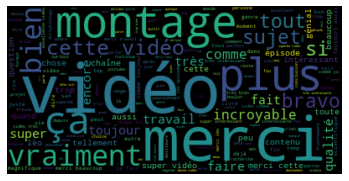

In [13]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

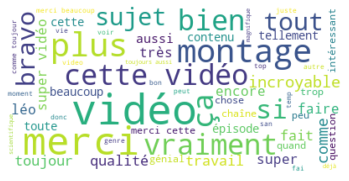

In [14]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=60, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
# Save the image in the img folder:
wordcloud.to_file("./graphs/wordcloud1.png")

### Autre essai

In [16]:
mask = np.array(Image.open("mask.png"))
#mask

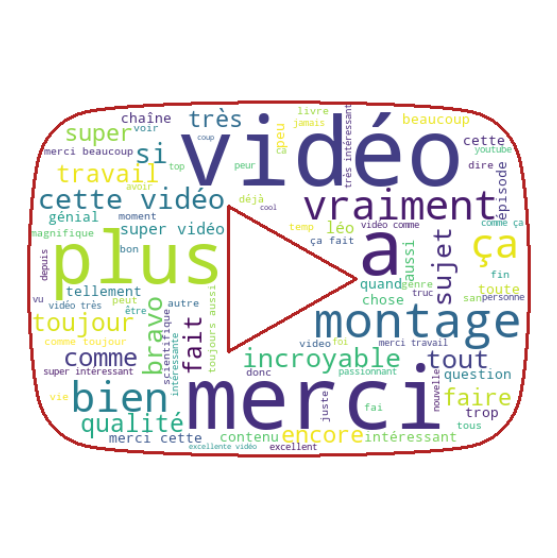

In [17]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=90, mask=mask,
               stopwords=stop_words, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("./graphs/logo_youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
mask2 = np.array(Image.open("mask2.png"))

In [19]:
def transform(image, s=200):
    clair = (image >= s)
    return 255-clair*255

mask2_bin = transform(mask2)

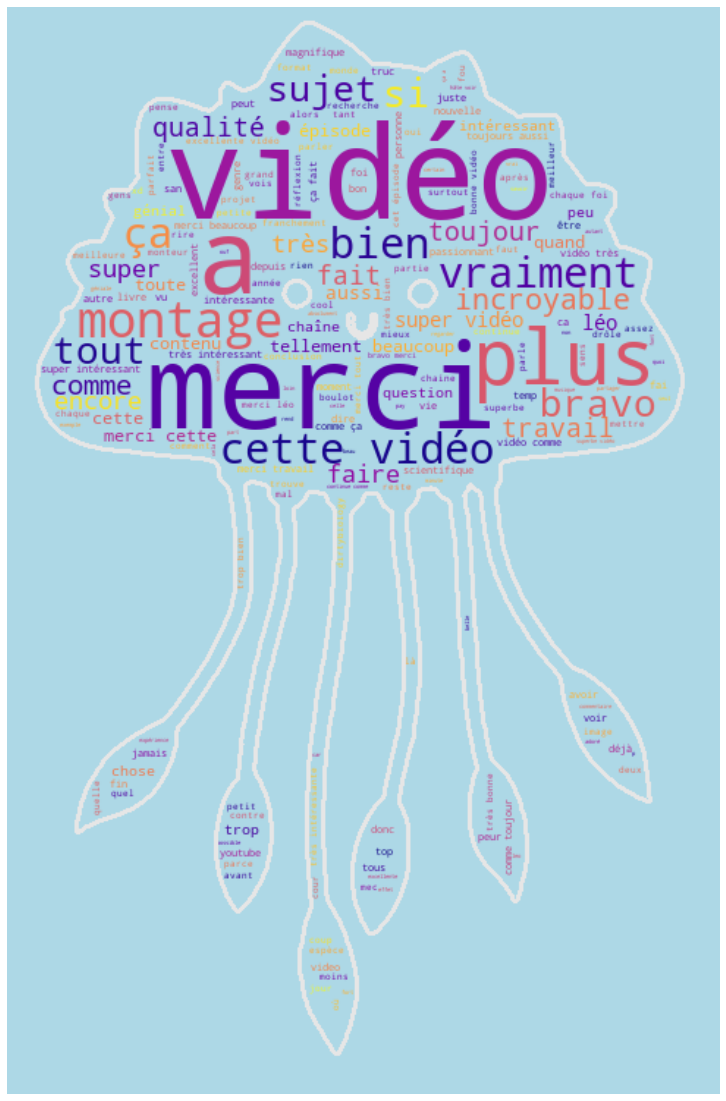

In [20]:
# Create a word cloud image
wc = WordCloud(background_color="lightblue", max_words=200, mask=mask2_bin,
               stopwords=stop_words, contour_width=3, contour_color=(230,230,230), colormap='plasma')
# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("./graphs/logo_dirty_bio.png")

# show
plt.figure(figsize=[30,20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()